Ajay Gaddameedi

Task-2

Prediction using Decision Tree Algorithm  

Installing Packages

Sklearn

Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection and evaluation, and many other utilities.

In [23]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#For Manuplating Dataset
import pandas as pd

#For Visualizing the Data
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns

#For Building Model
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
data=pd.read_csv("iris.csv")

In [34]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [37]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
data['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [39]:
# Data Wrangling

In [40]:
data = data.drop(['Id'], axis =1)

In [41]:
data=data.replace(to_replace={'Species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
data['Species'] = data['Species'].astype('category').cat.codes

In [42]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [43]:
# Data Visualization

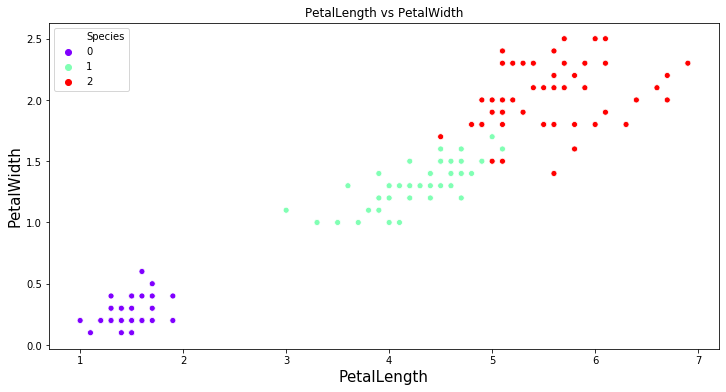

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["PetalLengthCm"] ,data['PetalWidthCm'],hue=data['Species'],palette="rainbow")
plt.title("PetalLength vs PetalWidth")
plt.xlabel("PetalLength",fontsize=15)
plt.ylabel("PetalWidth",fontsize=15)
plt.show()

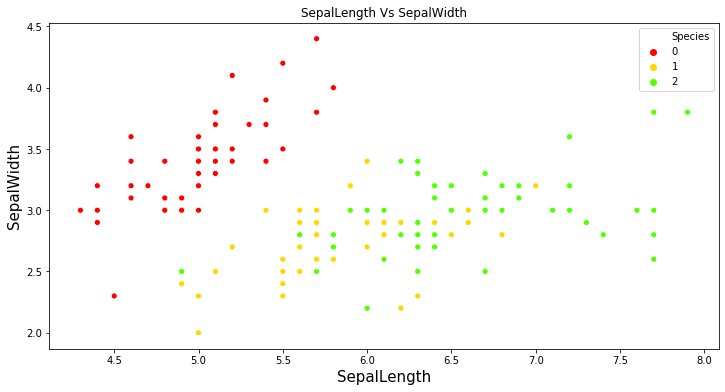

In [45]:
plt.figure(figsize=(12,6))
sns.scatterplot(data["SepalLengthCm"] ,data['SepalWidthCm'],hue=data['Species'],palette="prism")
plt.title("SepalLength Vs SepalWidth")
plt.xlabel("SepalLength",fontsize=15)
plt.ylabel("SepalWidth",fontsize=15)
plt.show()

[]

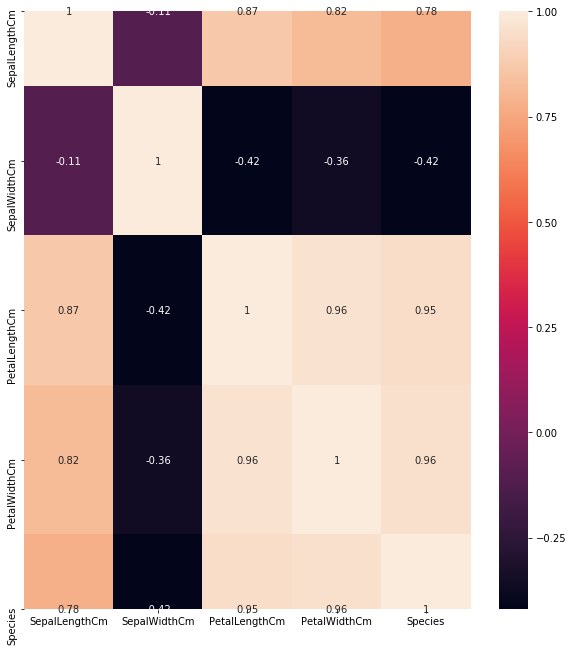

In [46]:
plt.figure(figsize=(10,11))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [47]:
# Model Building

In [48]:
x = data.drop(['Species'], axis =1)
y = data['Species']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [50]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [51]:
# Create an DecisionTreeClassifier instance
# Here Iam using criteria as 'Entropy'
model = DecisionTreeClassifier (criterion='gini',random_state=0)

# Fitting the training data
model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [52]:
# Predicting the values
y_pred = model.predict(x_test)

In [53]:
# Finding Accuracy Score
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score is  \t",accuracy*100)

Accuracy Score is  	 91.11111111111111


In [54]:
# Confusion Matrix
matrix=confusion_matrix(y_test,y_pred)
print('confusion matrix \n',matrix)

confusion matrix 
 [[16  0  0]
 [ 0 14  4]
 [ 0  0 11]]


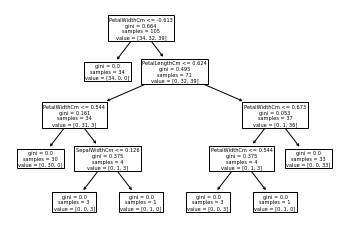

In [55]:
# Plotting the Tree
plt.figure()
feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
tree.plot_tree(model,feature_names =feature_names);
#Saving th Tree figure as png
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [56]:
# Predicting class for user input

In [57]:

sl=float(input("Enter Sepal Length : "))
sw=float(input("Enter Sepal Width : "))
pl=float(input("Enter Petal Length : "))
pw=float(input("Enter Petal width : "))

enteredData=[[sl,sw,pl,pw]]
result=model.predict(enteredData)
r={0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
print("Predicted Class is",r[result[0]])

Enter Sepal Length : 1
Enter Sepal Width : 1
Enter Petal Length : 1
Enter Petal width : 1
Predicted Class is Iris-virginica
